<a href="https://colab.research.google.com/github/Janeferdinant/TensorFlow-Pokemon-Course/blob/master/Natural_Language_Processing_with_Disaster_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Natural Language Processing with Disaster Tweets***
Predict which Tweets are about real disasters and which ones are not

# Data Description
What files do I need?
You'll need train.csv, test.csv and sample_submission.csv.

What should I expect the data format to be?
Each sample in the train and test set has the following information:

# The text of a tweet
A keyword from that tweet (although this may be blank!)
The location the tweet was sent from (may also be blank)

#What am I predicting?
You are predicting whether a given tweet is about a real disaster or not. If so, predict a 1. If not, predict a 0.

# Files
train.csv - the training set
test.csv - the test set
sample_submission.csv - a sample submission file in the correct format

# Columns
id - a unique identifier for each tweet,
text - the text of the tweet,
location - the location the tweet was sent from (may be blank),
keyword - a particular keyword from the tweet (may be blank),
target - in train.csv only, this denotes whether a tweet is about a real disaster (1) or not (0).

#Coding

In [1]:
# from google.colab import files

# uploaded = files.upload()

In [2]:
#Basic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

In [3]:
# text preprocessing 

import os #https://docs.python.org/3/library/os.html
import re #https://pymotw.com/2/re/
import string #https://docs.python.org/3/library/string.html
import pickle #https://docs.python.org/3/library/pickle.html
import nltk #https://www.nltk.org/
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords #https://www.nltk.org/api/nltk.corpus.html
#stemmers
from nltk.stem.porter import PorterStemmer #https://www.nltk.org/_modules/nltk/stem/porter.html | nltk.org/howto/stem.html
from nltk.stem import SnowballStemmer #https://www.nltk.org/_modules/nltk/stem/snowball.html | nltk.org/howto/stem.html
#lemmatizers
from nltk.stem.wordnet import WordNetLemmatizer #https://www.nltk.org/_modules/nltk/stem/wordnet.html

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [4]:
train_data=pd.read_csv("/content/train.csv")
test_data=pd.read_csv("/content/test.csv")

# EDA

In [5]:
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
test_data.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [7]:
print(train_data.shape)
print(test_data.shape)

(7613, 5)
(3263, 4)


In [8]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [10]:
train_data.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [11]:
test_data.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

In [12]:
print(train_data.shape)
train_filterdata = train_data.drop_duplicates('text', keep='last') #https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html
print(train_filterdata.shape)
print(train_filterdata.size/train_data.size*100)

(7613, 5)
(7503, 5)
98.55510311309602


In [13]:
print(test_data.shape)
test_filterdata = test_data.drop_duplicates('text', keep='last') #https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html
print(test_filterdata.shape)
print(test_filterdata.size/test_data.size*100)

(3263, 4)
(3243, 4)
99.38706711615079


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


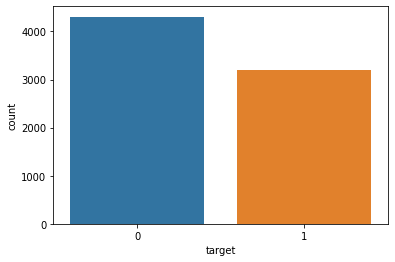

In [14]:
sns.countplot(train_filterdata['target'])

In [15]:
train_filterdata['target'].value_counts()

0    4307
1    3196
Name: target, dtype: int64

In [16]:
len(train_filterdata['keyword'].unique())

222

In [17]:
len(train_filterdata['keyword'].unique())

222

Unique keywords num=222
Unique keywords num=222


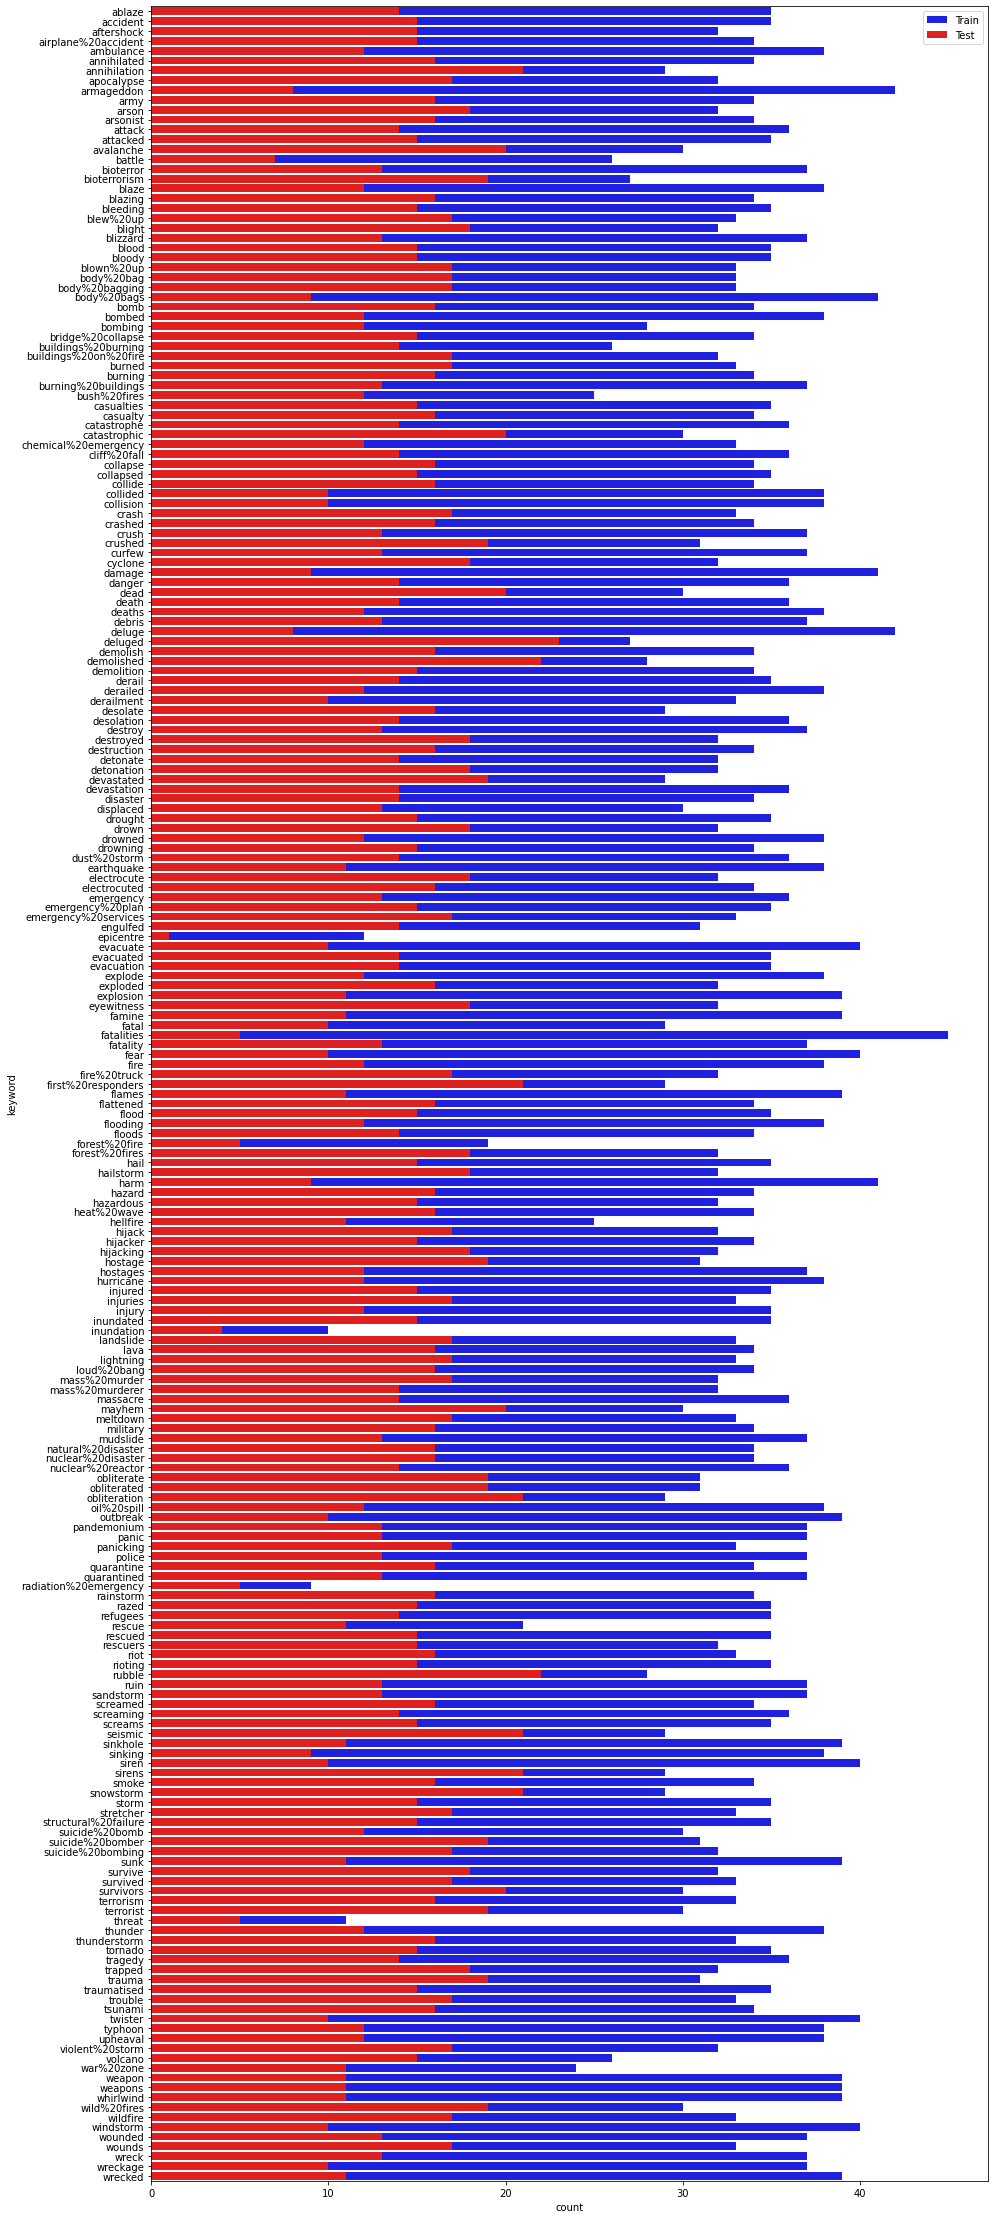

In [18]:
plt.figure(figsize=(15,40))
print(f'Unique keywords num={len(train_filterdata.keyword.unique())}')
print(f'Unique keywords num={len(test_filterdata.keyword.unique())}')
sns.countplot(y=train_filterdata['keyword'], color=(0,0,1), label='Train')
sns.countplot(y=test_filterdata['keyword'], color=(1,0,0), label='Test')
plt.legend()

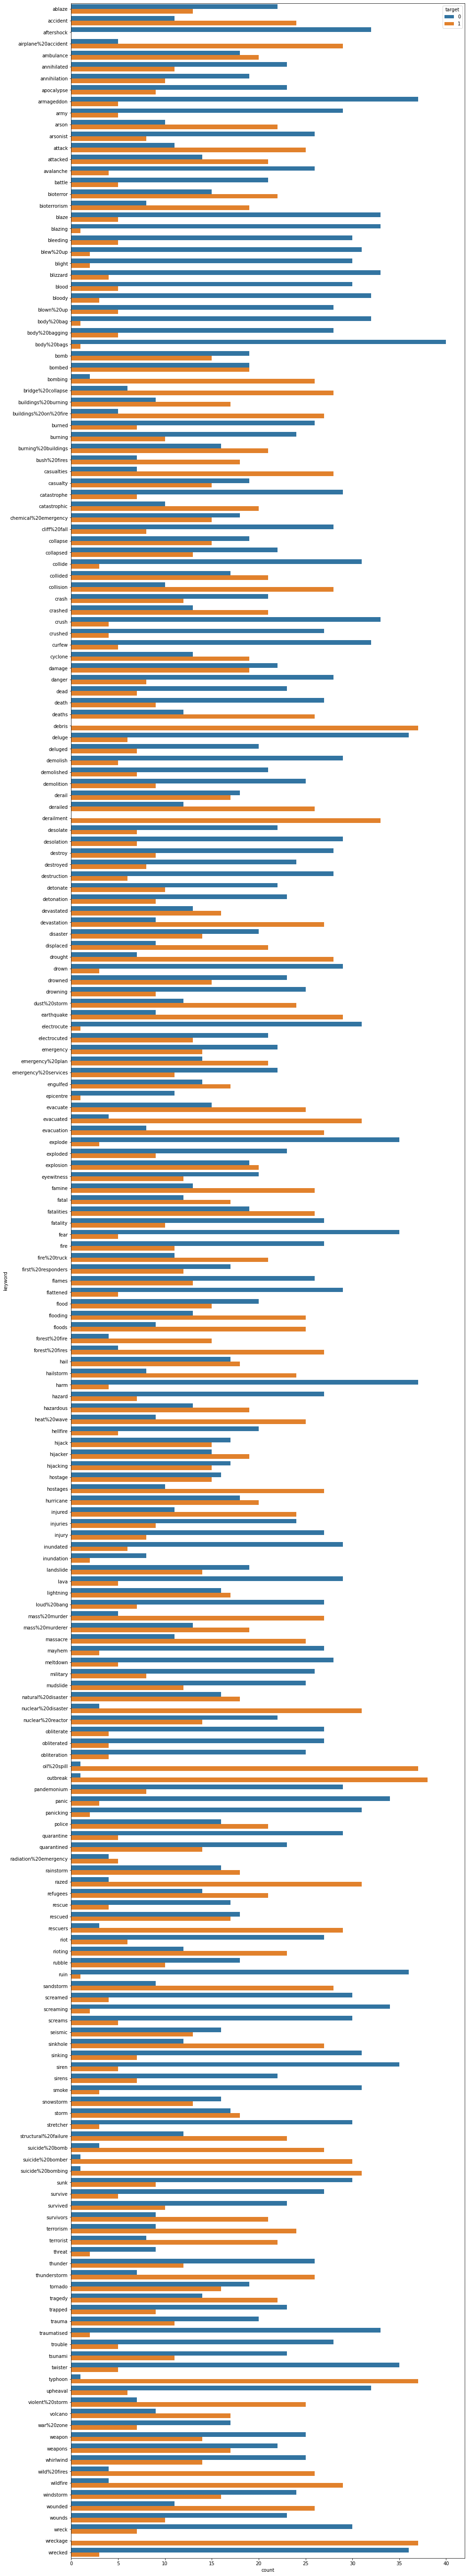

In [19]:
plt.figure(figsize=(15,100))
sns.countplot(data=train_filterdata, y='keyword', hue='target')

In [20]:
train_filterdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7503 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7503 non-null   int64 
 1   keyword   7442 non-null   object
 2   location  5021 non-null   object
 3   text      7503 non-null   object
 4   target    7503 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 671.7+ KB


In [21]:
print(len(train_filterdata['location'].unique()))
print(len(test_filterdata['location'].unique()))

3324
1601


In [22]:
print(train_filterdata['location'].isnull().sum())
print(test_filterdata['location'].isnull().sum())

2482
1098


In [23]:
train_filterdata.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

In [24]:
train_textdata=train_filterdata.drop(['id', 'keyword', 'location'],axis=1)
test_textdata=test_filterdata['text']

In [25]:
train_textdata.head(10)

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1
5,#RockyFire Update => California Hwy. 20 closed...,1
6,#flood #disaster Heavy rain causes flash flood...,1
7,I'm on top of the hill and I can see a fire in...,1
8,There's an emergency evacuation happening now ...,1
9,I'm afraid that the tornado is coming to our a...,1


In [26]:
train_textdata.tail(10)

,text,target
7603,Officials say a quarantine is in place at an A...,1
7604,#WorldNews Fallen powerlines on G:link tram: U...,1
7605,on the flip side I'm at Walmart and there is a...,1
7606,Suicide bomber kills 15 in Saudi security site...,1
7607,#stormchase Violent Record Breaking EF-5 El Re...,1
7608,Two giant cranes holding a bridge collapse int...,1
7609,@aria_ahrary @TheTawniest The out of control w...,1
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,Police investigating after an e-bike collided ...,1
7612,The Latest: More Homes Razed by Northern Calif...,1


In [27]:
print(train_textdata.text[0])

Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all


In [28]:
print(train_textdata['text'][1500])

catastrophic-fallen-angel: reveillertm: macabrelolita: I was supposed to write Û÷amino acidsÛª and I nearly... http://t.co/dIoBzGHFju


# Text-PreProcessing

In [57]:
stop_words = set(stopwords.words('english'))
port_stem=PorterStemmer()
sno_stem=SnowballStemmer('english')
wnet=WordNetLemmatizer( )

#https://pymotw.com/2/re/

In [58]:
print(stop_words)
print(sno_stem.stem('dedication'))

{'for', 'with', 'an', 'him', 'won', 'itself', 'which', 'yours', 'a', 'needn', 'do', 'having', 'have', 'and', 'off', 'each', 'her', 'you', 'don', 'm', 'y', 'who', 'that', 'just', 'ourselves', 'are', 'on', 'shan', 'if', 'has', 'than', "didn't", 'haven', "won't", "you've", 'those', 'there', 'about', "hadn't", 'from', "she's", 'me', 'these', "shouldn't", 'he', 'herself', 'both', 'mustn', 'when', 'been', 'how', 'my', 'then', 'own', 'was', 're', "hasn't", 'where', 'any', "should've", 'were', 'down', 'ours', 'such', "mightn't", 'during', "haven't", 'll', 'themselves', 'over', 'they', 'yourself', "wasn't", 'above', 'while', 'wasn', 'why', 'o', 'before', "isn't", "mustn't", 'not', 'against', 'ma', 'after', 'other', 'same', 'of', 'to', 'we', 'hers', 'through', 'shouldn', "aren't", 'nor', 've', 'between', 'what', 'again', "couldn't", "doesn't", 'this', 'should', 'their', 'into', 'out', 'doesn', 'below', 's', 'most', 'wouldn', "you'd", 'isn', 'yourselves', "that'll", 'it', 'because', 'our', 'hasn'

In [59]:
sent=train_textdata['text'].values[0]
print(sent)
sent = re.sub('[^a-zA-z]',' ', sent)
print(sent)

Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
Our Deeds are the Reason of this  earthquake May ALLAH Forgive us all


In [60]:
sent=train_textdata['text'].values[0]
print(sent)
sent = re.sub("\S*\d\S*", "", sent).strip()
print(sent)

Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all


In [61]:
sent=train_textdata['text'].values[1023]
print(sent)
sent = re.sub(r"http\S+",'URL', sent)
print(sent)

Womens Buckle Casual Stylish Shoulder Handbags Pockets Cross Body Bags White http://t.co/mWZQCjhZPb
Womens Buckle Casual Stylish Shoulder Handbags Pockets Cross Body Bags White URL


In [62]:


# def clean_punctuation(sentence):
#   clean_text_pt1 = re.sub(r'[?|!|\'|"|#]',r'',sentence)
#   clean_text_pt2 = re.sub(r'[.|,|:|;|)|(|\|/]',r' ',clean_text_pt1)
#   clean_text_pt3 = re.sub(r"http\S+",'URL',clean_text_pt2)
#   cleaned_text = text=re.sub('[^a-zA-z]',' ',clean_text_pt3)
#   return cleaned_text

# def decontracted(text):
#     # specific
#     tx1 = re.sub(r"won't", "will not", text)
#     tx1 = re.sub(r"can\'t", "can not", tx1)

#     # general
#     tx1 = re.sub(r"n\'t", " not", tx1)
#     tx1 = re.sub(r"\'re", " are", tx1)
#     tx1 = re.sub(r"\'s", " is", tx1)
#     tx1 = re.sub(r"\'d", " would", tx1)
#     tx1= re.sub(r"\'ll", " will", tx1)
#     tx1 = re.sub(r"\'t", " not", tx1)
#     tx1 = re.sub(r"\'ve", " have", tx1)
#     tx1 = re.sub(r"\'m", " am", tx1)
#     return phrase

# removing emojis, tags, html etc

# EMOJIS = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
#           ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
#           ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
#           ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
#           '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
#           '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
#           ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}



In [63]:
# Combining all the above stundents 
preprocessed_tweets = []

for sentance in tqdm(train_textdata['text'].values):
    sentance = re.sub(r"http\S+", 'URL', sentance)
    sentance = re.sub("\S*\d\S*", '', sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    sentance = ' '.join(word.lower() for word in sentance.split() if word.lower() not in stop_words)
    # sentance = ' '.join(wnet.lemmatize(word.lower()) for word in sentance.split() if word.lower() not in stop_words)
    # sentance = ' '.join(sno_stem.stem(word.lower()) for word in sentance.split() if word.lower() not in stop_words)
    preprocessed_tweets.append(sentance.strip())

  0%|          | 0/7503 [00:00<?, ?it/s]

In [64]:
len(preprocessed_tweets)

7503

In [65]:
preprocessed_tweets[7500]

'volcano hawaii url'

In [66]:
train_textdata['processed_text'] = preprocessed_tweets

In [67]:
train_textdata.head()

,text,target,processed_text
0,Our Deeds are the Reason of this #earthquake M...,1,deeds reason earthquake may allah forgive us
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,1,residents asked shelter place notified officer...
3,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders cal...
4,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfires pou...


In [68]:
train_textdata.tail()

,text,target,processed_text
7608,Two giant cranes holding a bridge collapse int...,1,two giant cranes holding bridge collapse nearb...
7609,@aria_ahrary @TheTawniest The out of control w...,1,aria ahrary thetawniest control wild fires cal...
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,volcano hawaii url
7611,Police investigating after an e-bike collided ...,1,police investigating e bike collided car littl...
7612,The Latest: More Homes Razed by Northern Calif...,1,latest homes razed northern california wildfir...


# Word Embedding

In [41]:
#Bag of words
from sklearn.feature_extraction.text import CountVectorizer #https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
count_vect = CountVectorizer()
final_bow= count_vect.fit_transform(train_textdata['processed_text'].values)
print(type(final_bow))
print(final_bow.get_shape())
x=final_bow.toarray()
y=train_textdata.target
print(x.shape)
print(y.shape)

<class 'scipy.sparse.csr.csr_matrix'>
(7503, 15559)
(7503, 15559)
(7503,)


In [42]:
#bi-grams,tri-grams & n-grams

count_vect = CountVectorizer(ngram_range=(1,3))
final_bigram_bow = count_vect.fit_transform(train_textdata['processed_text'].values)
print(type(final_bigram_bow))
print(final_bigram_bow.get_shape())
x=final_bigram_bow.toarray()
y=train_textdata.target
print(x.shape)
print(y.shape)

<class 'scipy.sparse.csr.csr_matrix'>
(7503, 108924)
(7503, 108924)
(7503,)


In [43]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer #https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
final_bigram_tfidf = tf_idf_vect.fit_transform(train_textdata['processed_text'].values)
print(type(final_bigram_tfidf))
print(final_bigram_tfidf.get_shape())
x=final_bigram_tfidf.toarray()
y=train_textdata.target
print(x.shape)
print(y.shape)

<class 'scipy.sparse.csr.csr_matrix'>
(7503, 62847)
(7503, 62847)
(7503,)


In [44]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [45]:
#to get the word/features
features = tf_idf_vect.get_feature_names()
print(len(features))
features[10100:10110]

62847


['classes',
 'classes together',
 'classic',
 'classic album',
 'classic barn',
 'classic original',
 'classic www',
 'classycolkett',
 'classycolkett thorgan',
 'clawing']

In [46]:
#Word2Vec
#https://radimrehurek.com/gensim/models/word2vec.html
import gensim
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

# word2vec = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin')

# To use this code-snippet, download "GoogleNews-vectors-negative300.bin" 
# from https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit
# it's 1.9GB in size.

In [47]:
list_of_sentwords=[]
for word in tqdm(train_textdata['processed_text'].values):
    list_of_sentwords.append(word.split())

  0%|          | 0/7503 [00:00<?, ?it/s]

In [48]:
print(train_textdata['processed_text'].values[0])
print('*'*50)
print(list_of_sentwords[0])

deeds reason earthquake may allah forgive us
**************************************************
['deeds', 'reason', 'earthquake', 'may', 'allah', 'forgive', 'us']


In [49]:
word2vec=gensim.models.Word2Vec(list_of_sentwords,min_count=2,size=50, workers=4)
words = list(word2vec.wv.vocab)
print(len(words))

6202


In [50]:
word2vec.wv

In [51]:
word2vec.wv.similarity('like','deeds')

0.9530533

In [52]:
word2vec.wv.most_similar('people')

[('new', 0.9999352693557739),
 ('police', 0.9999316334724426),
 ('today', 0.9999248385429382),
 ('day', 0.9999182224273682),
 ('amp', 0.9999163150787354),
 ('one', 0.9999140501022339),
 ('us', 0.9999120235443115),
 ('still', 0.9999107122421265),
 ('could', 0.9999074935913086),
 ('back', 0.9999063611030579)]

# Modelling

In [69]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
x_train,x_valid,y_train,y_valid=train_test_split(x,y,test_size=0.20,random_state=42)

In [70]:
#Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [71]:
#https://scikit-learn.org/stable/modules/naive_bayes.html
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_valid)
model_report = classification_report(y_valid,y_pred)
accu_score = accuracy_score(y_valid,y_pred)
conf_matrix=confusion_matrix(y_valid,y_pred)
print(conf_matrix)
print()
print(accu_score)
print()
print(model_report)


[[799  54]
 [252 396]]

0.7961359093937375

              precision    recall  f1-score   support

           0       0.76      0.94      0.84       853
           1       0.88      0.61      0.72       648

    accuracy                           0.80      1501
   macro avg       0.82      0.77      0.78      1501
weighted avg       0.81      0.80      0.79      1501



In [72]:
# class_preds=model.predict(x_test)
# result_df = pd.DataFrame(
#     {
#         'id': data.id,
#         'target': class_preds
#     })


# result_df.to_csv('submission.csv', index=False)
# result_df.head(10)